In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Assignment 3 - Clustering

### Load Data


In [2]:
#Load Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mnist = mnist[0:15000]
X = mnist["data"][0:15000]
#X = mnist.data[:15000]
print(X.shape)

c:\Users\desla\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(15000, 784)


### Clustering Data


In [48]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducing dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Using KMeans to cluster the data into 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

cluster_labels = kmeans.labels_



c:\Users\desla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Examine Clusters

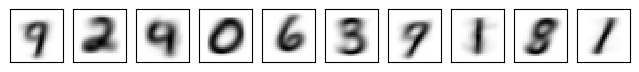

In [49]:
# Visualizing the clusters to see the numbers
fig, ax = plt.subplots(1, 10, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [56]:
# Assigning labels manually to each cluster
manual_labels = {0: 9, 1: 2, 2: 4, 3: 0, 4: 6, 5: 3, 6: 7, 7: 1, 8: 8, 9: 1}

### GMM Modelling

In [58]:
# Using GMM to train each cluster
gmm_models = []
for i in range(10):
    cluster_X = X[cluster_labels == i]
    gmm_model = GaussianMixture(n_components=30, covariance_type='full')
    gmm_model.fit(cluster_X)
    gmm_models.append(gmm_model)


### Final Results

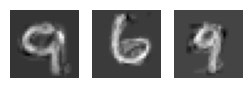

In [60]:
# Function to produce a generated handwritten version of input number
def writeNumber(number):
    fig, axes = plt.subplots(1, len(str(number)), figsize=(len(str(number)), 1))
    if len(str(number)) == 1:
        axes = [axes]
    for i, digit in enumerate(str(number)):
        digit = int(digit)
        gmm_model = gmm_models[manual_labels[digit]]
        generated_digit = gmm_model.sample(1)[0]
        axes[i].imshow(generated_digit.reshape(28, 28), cmap='gray')
        axes[i].axis('off')
    plt.show()

# Test writeNumber
writeNumber(123)